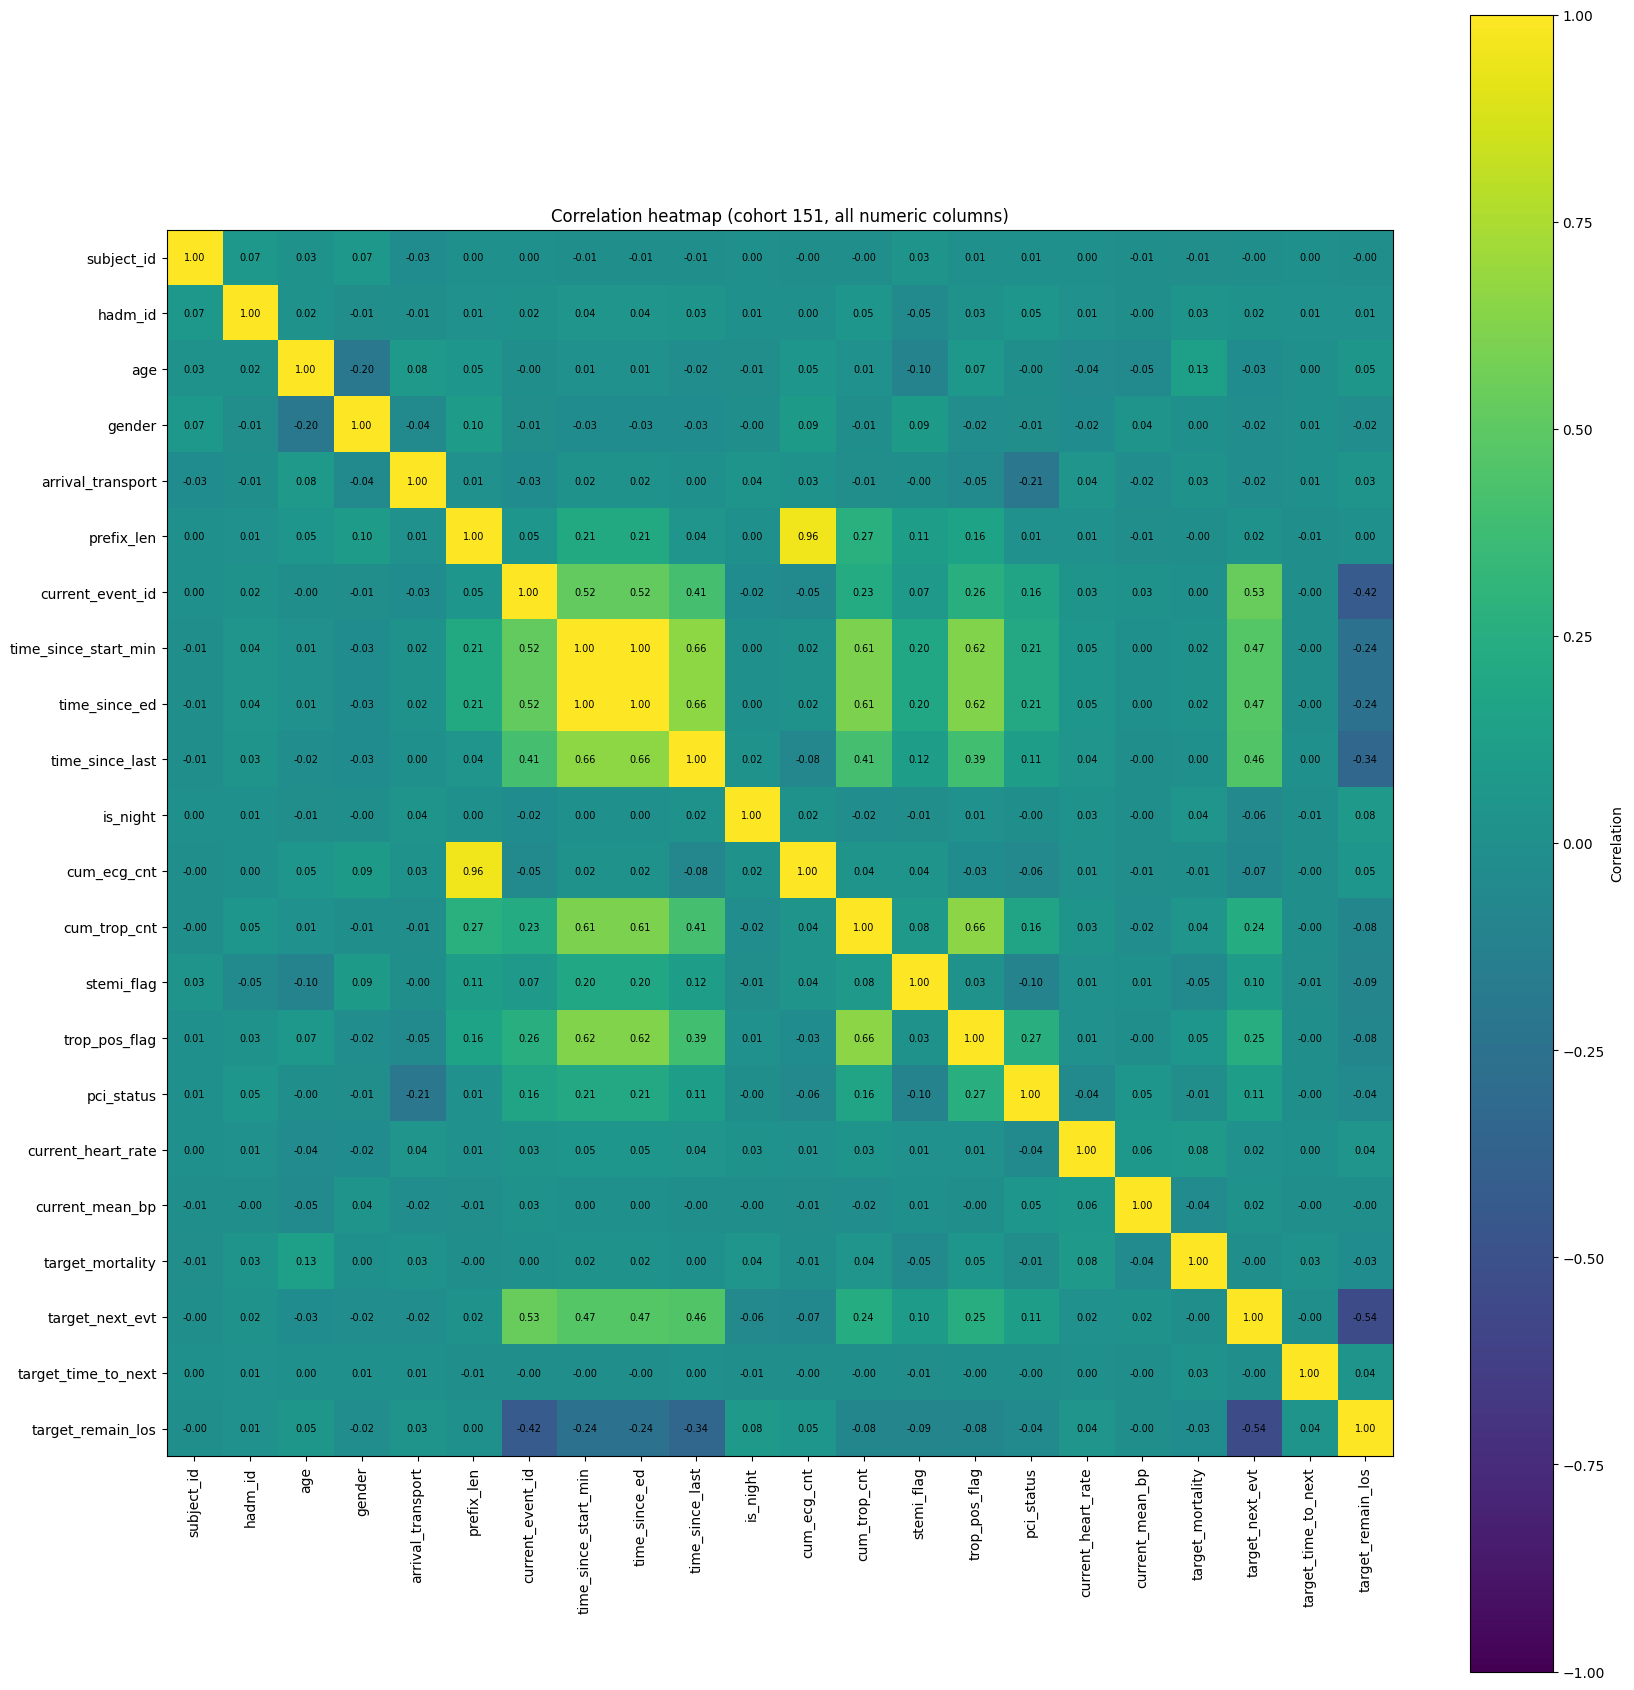

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 로딩
path = "./../cohort/cohort_ver151_reorder_col.csv"
df = pd.read_csv(path)

# 2. 수치형 컬럼만 선택
num_df = df.select_dtypes(include=[np.number])
cols = num_df.columns.tolist()

# (선택) 전부 NaN이거나 분산 0인 컬럼은 제거
num_df = num_df.dropna(axis=1, how="all")
num_df = num_df.loc[:, num_df.var() > 0]
cols = num_df.columns.tolist()

# 3. 상관계수 행렬 계산
corr = num_df.corr()

# 4. Heatmap + 상관계수 숫자 표시
n = len(cols)
fig, ax = plt.subplots(figsize=(0.6 * n + 4, 0.6 * n + 4))

im = ax.imshow(corr, vmin=-1, vmax=1)  # 기본 colormap 사용
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Correlation")

# 축 라벨
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
ax.set_xticklabels(cols, rotation=90)
ax.set_yticklabels(cols)

# 셀마다 상관계수 숫자 적기
for i in range(n):
    for j in range(n):
        value = corr.iloc[i, j]
        if pd.isna(value):
            text = ""
        else:
            text = f"{value:.2f}"
        ax.text(j, i, text,
                ha="center", va="center", fontsize=7)

ax.set_title("Correlation heatmap (cohort 151, all numeric columns)")
fig.tight_layout()
plt.show()
